# Fligoo: Take Home -  Data Science

# The Hotel Bookings Data

Let’s use hotel bookings data from [Antonio, Almeida, and Nunes (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub) to predict which hotel stays included children and/or babies, based on the other characteristics of the stays such as which hotel the guests stay at, how much they pay, etc.

<img src="https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/header.png"/>

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 23 variables describing the 19248 observations of H1 and 30752 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.

**Take-Home Goals**
- During **Part I** you should perform an Exploratory Data Analisys highlighting key findings:
  - Data Quality Check: You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data if any.
  - Report insights and conclusions: Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by charts / tables / metrics.
- On **Part II** you should define and train a model to predict which actual hotel stays included children/babies, and which did not:
  - Feature extraction: Indicate some possible candidates of features that could properly describe the hotels, either from the given columns or from their transformations.
  - Machine Learning modeling: at least one fitted model with the given data. You could use the `children` column as target.
- Finally, on **Part III** you should present the key findings, conclusions and results to non-technical stakeholders.
  
**Requirements**
- Python 3.x & Pandas 1.x or R & Tidyverse & Tidymodels
- Paying attention to the details and narrative is far way more important than extensive development.
- Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) or share the repository link.
- Have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.
- Finally, but most important: Have fun!

**Nice to have aspects**
- Dockerfile to setup environment / Conda environment for isolation.
- Code versioning with Git (you are free to publish it on your own Github/Bitbucket account!).
- Show proficiency in Python: By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.


# Libraries & Const

In [1]:
#General purpose
import pandas as pd

#Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Metrics
from sklearn import metrics

In [2]:
path = 'https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/'

# Import data

In [3]:
hotels = pd.read_csv(path+'hotels.csv')
hotels.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_date
0,City_Hotel,217,1,3,2,none,BB,DEU,Offline_TA/TO,TA/TO,...,A,A,0,No_Deposit,0,Transient-Party,80.75,none,1,2016-09-01
1,City_Hotel,2,0,1,2,none,BB,PRT,Direct,Direct,...,D,K,0,No_Deposit,0,Transient,170.00,none,3,2017-08-25
2,Resort_Hotel,95,2,5,2,none,BB,GBR,Online_TA,TA/TO,...,A,A,2,No_Deposit,0,Transient,8.00,none,2,2016-11-19
3,Resort_Hotel,143,2,6,2,none,HB,ROU,Online_TA,TA/TO,...,A,A,0,No_Deposit,0,Transient,81.00,none,1,2016-04-26
4,Resort_Hotel,136,1,4,2,none,HB,PRT,Direct,Direct,...,F,F,0,No_Deposit,0,Transient,157.60,none,4,2016-12-28


# Part I - Exploratory Data Analisys

In [4]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50000 non-null  object 
 1   lead_time                       50000 non-null  int64  
 2   stays_in_weekend_nights         50000 non-null  int64  
 3   stays_in_week_nights            50000 non-null  int64  
 4   adults                          50000 non-null  int64  
 5   children                        50000 non-null  object 
 6   meal                            50000 non-null  object 
 7   country                         49711 non-null  object 
 8   market_segment                  50000 non-null  object 
 9   distribution_channel            50000 non-null  object 
 10  is_repeated_guest               50000 non-null  int64  
 11  previous_cancellations          50000 non-null  int64  
 12  previous_bookings_not_canceled  

In [5]:
hotels.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,total_of_special_requests
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000
mean,80.094120,0.928520,2.464540,1.830280,0.043200,0.016740,0.202740,0.294960,1.5704,99.942342,0.712660
std,91.201362,0.996288,1.936176,0.509078,0.203309,0.287857,1.803691,0.740006,14.7903,49.039092,0.833804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,-6.380000,0.000000
25%,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,67.500000,0.000000
50%,45.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,92.500000,1.000000
75%,125.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,125.000000,1.000000
max,709.000000,19.000000,50.000000,4.000000,1.000000,13.000000,72.000000,21.000000,379.0000,510.000000,5.000000


In [6]:
#First, check if the target is unbalanced
hotels['children'].value_counts()

none        45962
children     4038
Name: children, dtype: int64

In [7]:
hotels.groupby(['children','hotel']).count()

lead_time  stays_in_weekend_nights  \
children hotel                                              
children City_Hotel         2369                     2369   
         Resort_Hotel       1669                     1669   
none     City_Hotel        28383                    28383   
         Resort_Hotel      17579                    17579   

                       stays_in_week_nights  adults   meal  country  \
children hotel                                                        
children City_Hotel                    2369    2369   2369     2369   
         Resort_Hotel                  1669    1669   1669     1657   
none     City_Hotel                   28383   28383  28383    28383   
         Resort_Hotel                 17579   17579  17579    17302   

                       market_segment  distribution_channel  \
children hotel                                                
children City_Hotel              2369                  2369   
         Resort_Hotel            1669                  1669   
none     City_Hotel             28383                 28383   
         Resort_Hotel           17579                 17579   

                       is_repeated_guest  previous_cancellations  ...  \
children hotel                                                    ...   
children City_Hotel                 2369                    2369  ...   
         Resort_Hotel               1669                    1669  ...   
none     City_Hotel                28383                   28383  ...   
         Resort_Hotel              17579                   17579  ...   

                       reserved_room_type  assigned_room_type  \
children hotel                                                  
children City_Hotel                  2369                2369   
         Resort_Hotel                1669                1669   
none     City_Hotel                 28383               28383   
         Resort_Hotel               17579               17579   

                       booking_changes  deposit_type  days_in_waiting_list  \
children hotel                                                               
children City_Hotel               2369          2369                  2369   
         Resort_Hotel             1669          1669                  1669   
none     City_Hotel              28383         28383                 28383   
         Resort_Hotel            17579         17579                 17579   

                       customer_type  average_daily_rate  \
children hotel                                             
children City_Hotel             2369                2369   
         Resort_Hotel           1669                1669   
none     City_Hotel            28383               28383   
         Resort_Hotel          17579               17579   

                       required_car_parking_spaces  total_of_special_requests  \
children hotel                                                                  
children City_Hotel                           2369                       2369   
         Resort_Hotel                         1669                       1669   
none     City_Hotel                          28383                      28383   
         Resort_Hotel                        17579                      17579   

                       arrival_date  
children hotel                       
children City_Hotel            2369  
         Resort_Hotel          1669  
none     City_Hotel           28383  
         Resort_Hotel         17579  

[4 rows x 21 columns]

## Univariate analysis

In [8]:
def bar_graph_values(col):
    sns.countplot(y = col,
                  data = hotels,
                  orient = "h",
                  order = hotels[col].value_counts().index)

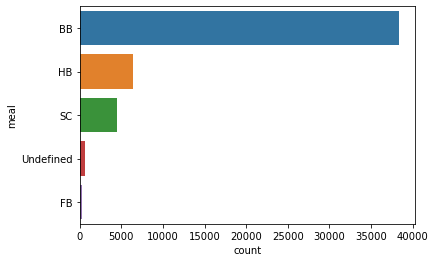

In [9]:
bar_graph_values('meal')

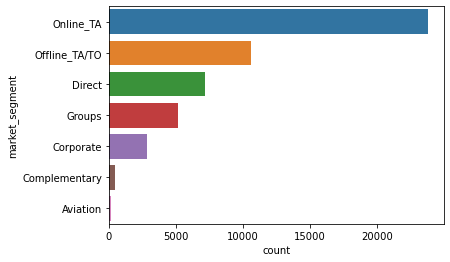

In [10]:
bar_graph_values('market_segment')

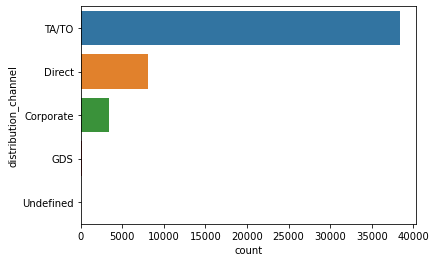

In [11]:
bar_graph_values('distribution_channel')

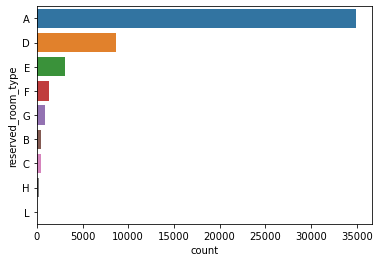

In [12]:
bar_graph_values('reserved_room_type')

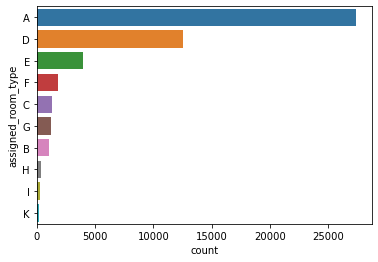

In [13]:
bar_graph_values('assigned_room_type')

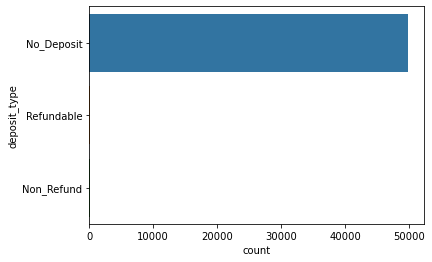

In [14]:
bar_graph_values('deposit_type')

In [15]:
#As it has almost no variety
hotels.drop('deposit_type',axis=1,inplace=True)

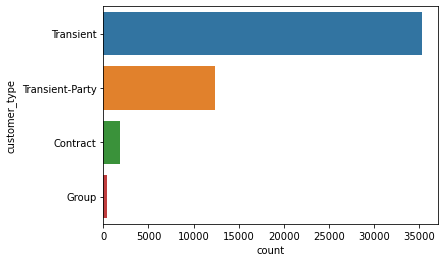

In [16]:
bar_graph_values('customer_type')

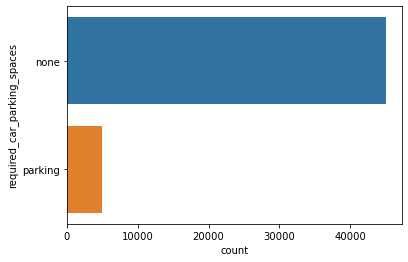

In [17]:
bar_graph_values('required_car_parking_spaces')

In [18]:
# Date is not relevant
hotels.drop('arrival_date',axis=1,inplace=True)
# Children are accompanied by an adult
hotels.drop('adults',axis=1,inplace=True)

## Nulls management

In [19]:
#Check if exists any null
hotels.isna().sum()

hotel                               0
lead_time                           0
stays_in_weekend_nights             0
stays_in_week_nights                0
children                            0
meal                                0
country                           289
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
days_in_waiting_list                0
customer_type                       0
average_daily_rate                  0
required_car_parking_spaces         0
total_of_special_requests           0
dtype: int64

In [20]:
#Check if I can fill nulls with mode
hotels['country'].value_counts()

PRT    14046
GBR     6405
FRA     5627
ESP     4298
DEU     4047
       ...  
CYM        1
PAN        1
MDG        1
LAO        1
ATA        1
Name: country, Length: 154, dtype: int64

In [21]:
# Another strategy: fill with "No available" o eq
hotels['country'] = hotels['country'].fillna('PRT')

## Cast

In [22]:
hotels['hotel'] = hotels['hotel'].map({
    'City_Hotel': 0,
    'Resort_Hotel': 1})

hotels['children'] = hotels['children'].map({
    'none': 0,
    'children': 1})

hotels['meal'] = hotels['meal'].map({
    'Undefined': 0,
    'SC': 1,
    'HB': 2,
    'FB': 3})

hotels['distribution_channel'] = hotels['distribution_channel'].map({
    'Undefined': 0,
    'TA/TO': 1,
    'Direct': 2,
    'Corporate': 3,
    'GDS': 4})

hotels['required_car_parking_spaces'] = hotels['required_car_parking_spaces'].map({
    'none': 0,
    'parking': 1})

In [23]:
#Encoding
def encoder(col):
    le = LabelEncoder()
    return le.fit_transform(hotels[col])

In [24]:
#Other strategy: get_dummies
hotels['country'] = encoder('country')
hotels['market_segment'] = encoder('market_segment')
hotels['reserved_room_type'] = encoder('reserved_room_type')
hotels['assigned_room_type'] = encoder('assigned_room_type')
hotels['customer_type'] = encoder('customer_type')

## Bivariate

In [25]:
def box_graph_bivar(colx,coly):
    plt.figure(figsize = (10,10))
    sns.boxplot(data = hotels, x=colx, y=coly, palette = 'cubehelix')
    plt.xticks(rotation = 90)
    plt.show()

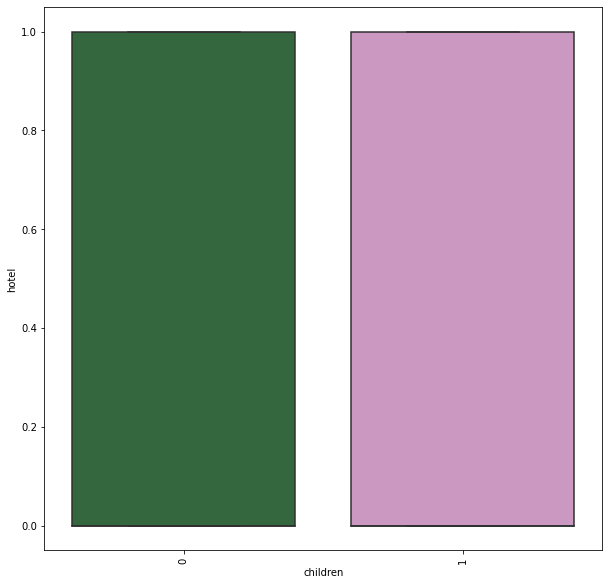

In [26]:
box_graph_bivar('children','hotel')

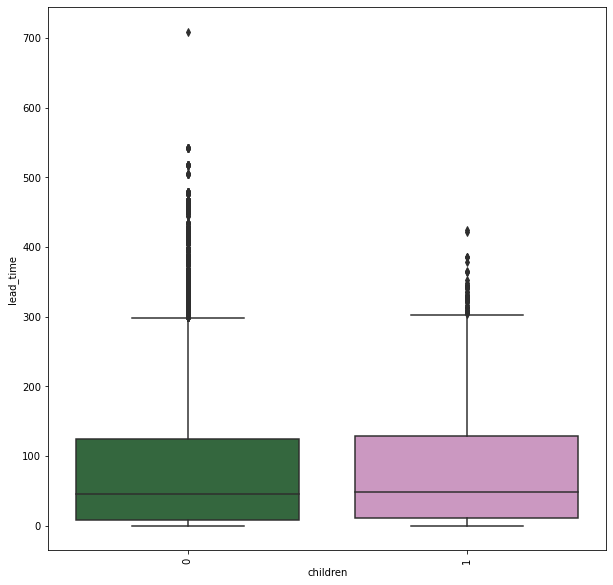

In [27]:
box_graph_bivar('children','lead_time')

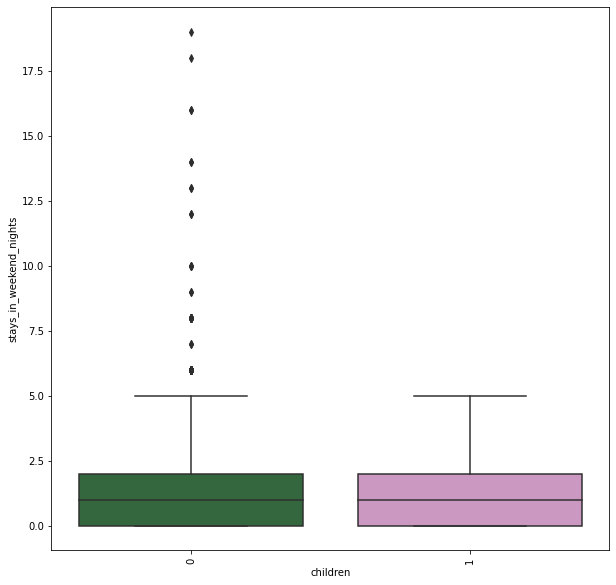

In [28]:
box_graph_bivar('children','stays_in_weekend_nights')

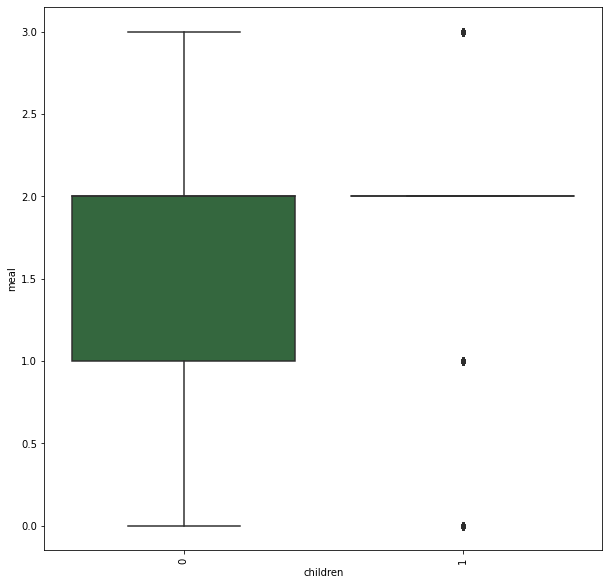

In [29]:
box_graph_bivar('children','meal')

In [30]:
hotels.drop('meal',axis=1,inplace=True)

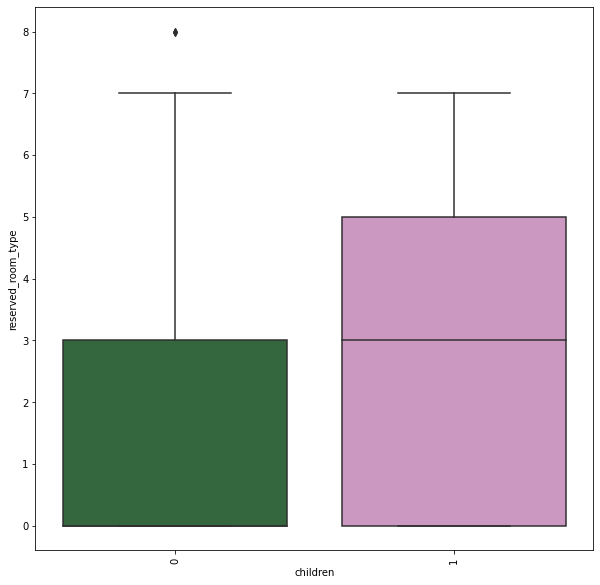

In [31]:
box_graph_bivar('children','reserved_room_type')

# Part II - Modeling

We will build the best model to predict which actual hotel stays included children/babies, and which did not:

## Feature selection

### Corr

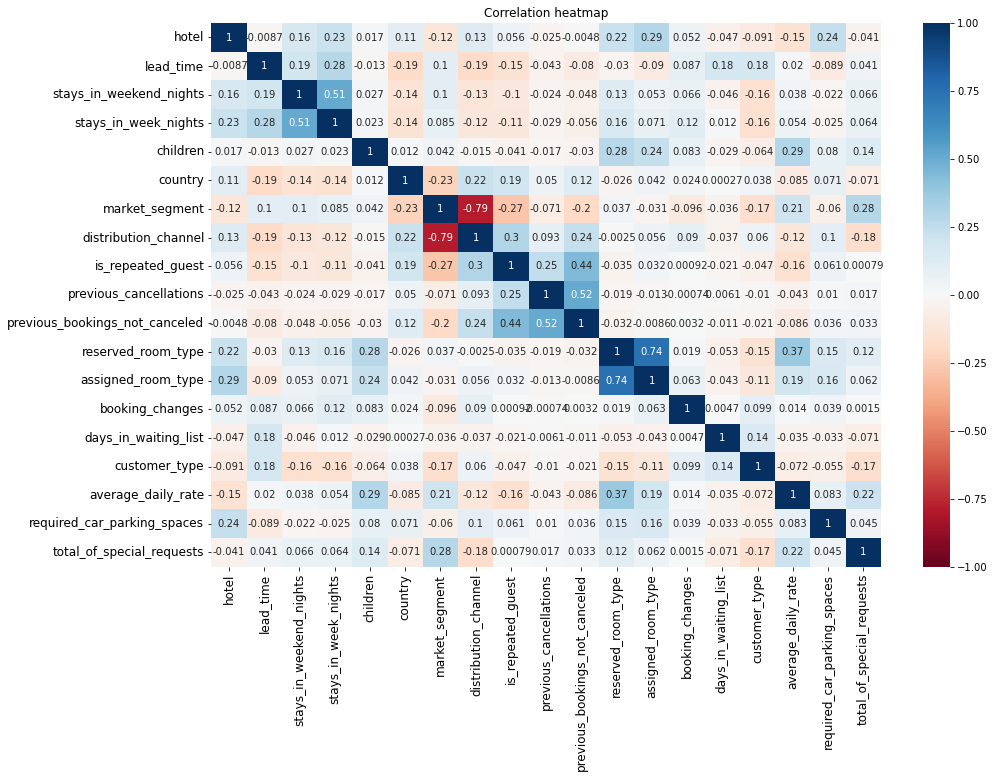

In [32]:
plt.figure(figsize = (15, 10))
s = sns.heatmap(hotels.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation heatmap')
plt.show()

In [33]:
#Market_segment and distribution_channel are strongly correlated, I stay dc that has more detail
hotels.drop('market_segment',axis=1,inplace=True)

#As the type of hotel does not have a significant distribution for the target
hotels.drop('hotel',axis=1,inplace=True)

## Model

### Balance

In [34]:
target = hotels['children']
features = hotels[hotels.columns.drop('children')]

In [35]:
undersample = NearMiss(version=1, n_neighbors=3)

In [36]:
X, y = undersample.fit_resample(features, target)

In [37]:
y.value_counts()

0    4038
1    4038
Name: children, dtype: int64

### Train & Test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Gridsearch

In [39]:
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

In [40]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [41]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]

In [42]:
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)

In [43]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

{'classifier': GradientBoostingClassifier(max_depth=5, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100}

In [44]:
# ROC-AUC score for the best model
gs.best_score_

0.9733402283276442

### Model

In [45]:
model = GradientBoostingClassifier(max_depth=5, random_state=42)
model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [46]:
y_pred = model.predict(X_test)

# Part III - Results & Conclusions

## Metrics

In [47]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1218
           1       0.92      0.90      0.91      1205

    accuracy                           0.92      2423
   macro avg       0.92      0.92      0.92      2423
weighted avg       0.92      0.92      0.92      2423



## Conclusions

Although the model analyzes two hotels, both are similar, which allows unifying the development.

The target was unbalanced, so an undersampling technique has been used, in other words, a sample of the majority class was collected.

To select a model, a GridSearchCV method was used. The result was a GradientBoostingClassifier with an accuracy of 91%.

Next steps: check if there is overfitting, try an scaler, work on explanability and generate pkl file to export.